<a href="https://colab.research.google.com/github/kholiqhidayat/UAS-Praktikum-Pengolahan-Citra-PCD/blob/main/CNN_G_231_22_0097.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks
import matplotlib.pyplot as plt

In [2]:
# load CIFAR-10
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# normalisasi
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# one-hot atau gunakan sparse_categorical pada compile
num_classes = 10
y_train = y_train.flatten()
y_test = y_test.flatten()

# split validation dari train
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)
print("Shapes:", x_train.shape, x_val.shape, x_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Shapes: (45000, 32, 32, 3) (5000, 32, 32, 3) (10000, 32, 32, 3)


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.08,
    height_shift_range=0.08,
    horizontal_flip=True
)

# generator (fit not needed for CIFAR)
train_gen = train_datagen.flow(x_train, y_train, batch_size=64)

In [4]:
def build_simple_cnn(input_shape=(32,32,3), num_classes=10):
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.25),

        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.4),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

model = build_simple_cnn()
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 404,394 (1.54 MB)

 Trainable params: 403,690 (1.54 MB)

 Non-trainable params: 704 (2.75 KB)

In [5]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

ckpt = callbacks.ModelCheckpoint('cnn_NIM12345_best.h5', save_best_only=True, monitor='val_accuracy', mode='max')
es = callbacks.EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

In [6]:
epochs = 30
history = model.fit(
    train_gen,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[ckpt, es],
    steps_per_epoch = len(x_train)//64
)

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


703/703 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.3046 - loss: 2.1390

703/703 ━━━━━━━━━━━━━━━━━━━━ 48s 49ms/step - accuracy: 0.3047 - loss: 2.1385 - val_accuracy: 0.4754 - val_loss: 1.4407
Epoch 2/30
  1/703 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5312 - loss: 1.2215

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


703/703 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - accuracy: 0.5312 - loss: 1.2215 - val_accuracy: 0.4688 - val_loss: 1.4693
Epoch 3/30
702/703 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5211 - loss: 1.3326

703/703 ━━━━━━━━━━━━━━━━━━━━ 27s 38ms/step - accuracy: 0.5212 - loss: 1.3324 - val_accuracy: 0.5900 - val_loss: 1.1362
Epoch 4/30
  1/703 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.4844 - loss: 1.4292

703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 792us/step - accuracy: 0.4844 - loss: 1.4292 - val_accuracy: 0.5930 - val_loss: 1.1288
Epoch 5/30
702/703 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5945 - loss: 1.1339

703/703 ━━━━━━━━━━━━━━━━━━━━ 26s 38ms/step - accuracy: 0.5945 - loss: 1.1338 - val_accuracy: 0.6524 - val_loss: 0.9872
Epoch 6/30
703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 925us/step - accuracy: 0.6094 - loss: 1.0404 - val_accuracy: 0.6466 - val_loss: 1.0016
Epoch 7/30
703/703 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.6439 - loss: 1.0201 - val_accuracy: 0.6498 - val_loss: 0.9833
Epoch 8/30
703/703 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - accuracy: 0.6875 - loss: 0.8000 - val_accuracy: 0.6504 - val_loss: 0.9837
Epoch 9/30
703/703 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6659 - loss: 0.9438

703/703 ━━━━━━━━━━━━━━━━━━━━ 27s 38ms/step - accuracy: 0.6659 - loss: 0.9437 - val_accuracy: 0.6808 - val_loss: 0.9170
Epoch 10/30
  1/703 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.6875 - loss: 0.7317

703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 801us/step - accuracy: 0.6875 - loss: 0.7317 - val_accuracy: 0.6824 - val_loss: 0.9154
Epoch 11/30
703/703 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6843 - loss: 0.8993

703/703 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.6843 - loss: 0.8993 - val_accuracy: 0.7224 - val_loss: 0.7948
Epoch 12/30
  1/703 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.7031 - loss: 0.9010

703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 804us/step - accuracy: 0.7031 - loss: 0.9010 - val_accuracy: 0.7276 - val_loss: 0.7845
Epoch 13/30
702/703 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7057 - loss: 0.8426

703/703 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.7057 - loss: 0.8426 - val_accuracy: 0.7444 - val_loss: 0.7347
Epoch 14/30
  1/703 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.7031 - loss: 0.9658

703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 862us/step - accuracy: 0.7031 - loss: 0.9658 - val_accuracy: 0.7460 - val_loss: 0.7279
Epoch 15/30
703/703 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.7153 - loss: 0.8113 - val_accuracy: 0.7082 - val_loss: 0.8273
Epoch 16/30
703/703 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.7812 - loss: 0.6981 - val_accuracy: 0.7042 - val_loss: 0.8389
Epoch 17/30
703/703 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7264 - loss: 0.7917

703/703 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.7264 - loss: 0.7917 - val_accuracy: 0.7636 - val_loss: 0.6678
Epoch 18/30
703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 703us/step - accuracy: 0.6875 - loss: 0.8226 - val_accuracy: 0.7628 - val_loss: 0.6638
Epoch 19/30
703/703 ━━━━━━━━━━━━━━━━━━━━ 26s 38ms/step - accuracy: 0.7342 - loss: 0.7683 - val_accuracy: 0.7320 - val_loss: 0.7700
Epoch 20/30
703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 898us/step - accuracy: 0.6406 - loss: 1.0575 - val_accuracy: 0.7320 - val_loss: 0.7620
Epoch 21/30
703/703 ━━━━━━━━━━━━━━━━━━━━ 26s 38ms/step - accuracy: 0.7425 - loss: 0.7426 - val_accuracy: 0.7576 - val_loss: 0.6889
Epoch 22/30
703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 719us/step - accuracy: 0.7812 - loss: 0.5853 - val_accuracy: 0.7568 - val_loss: 0.6911
Epoch 23/30
702/703 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7483 - loss: 0.7233

703/703 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.7483 - loss: 0.7233 - val_accuracy: 0.7666 - val_loss: 0.6712
Epoch 24/30
703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 703us/step - accuracy: 0.7344 - loss: 0.7626 - val_accuracy: 0.7658 - val_loss: 0.6727
Epoch 25/30
703/703 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.7565 - loss: 0.7103 - val_accuracy: 0.7552 - val_loss: 0.6971
Epoch 26/30
703/703 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - accuracy: 0.7969 - loss: 0.7345 - val_accuracy: 0.7550 - val_loss: 0.6976


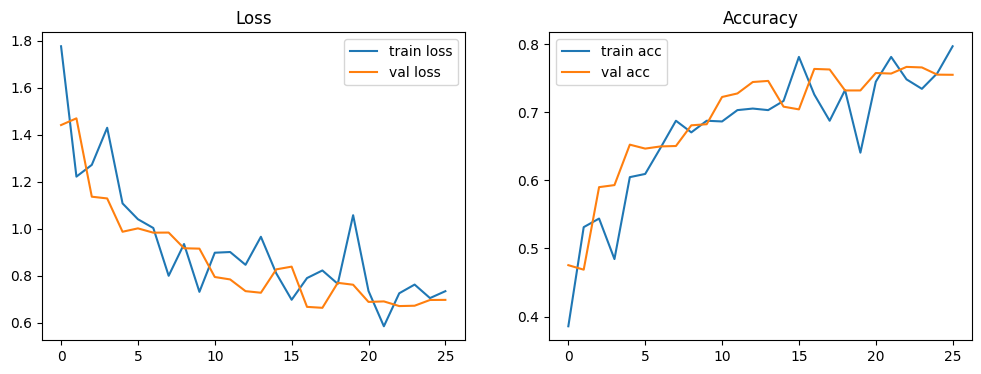

In [7]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')
plt.show()

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}, Test loss: {test_loss:.4f}")

313/313 - 2s - 6ms/step - accuracy: 0.7667 - loss: 0.6846
Test accuracy: 0.7667, Test loss: 0.6846


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 757ms/step


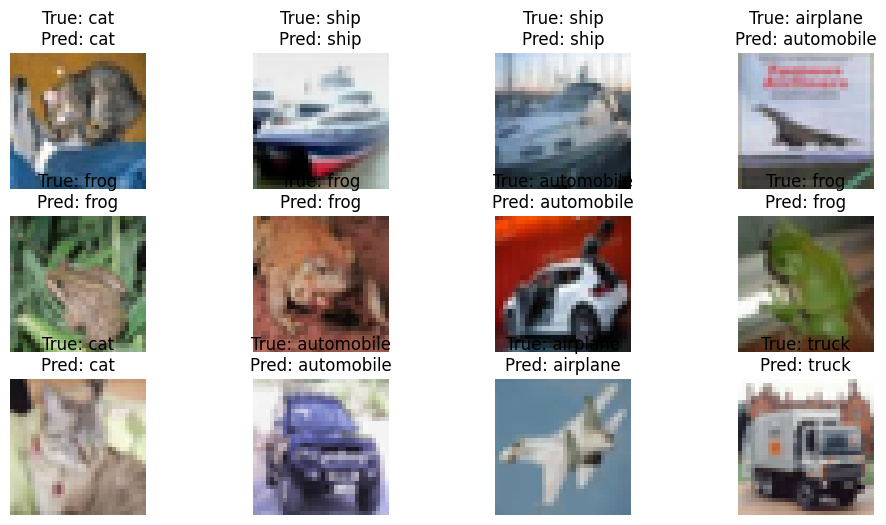

In [9]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

preds = model.predict(x_test[:12])
pred_labels = np.argmax(preds, axis=1)

plt.figure(figsize=(12,6))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(x_test[i])
    plt.title(f"True: {class_names[y_test[i]]}\nPred: {class_names[pred_labels[i]]}")
    plt.axis('off')
plt.show()


In [10]:
model.save('CNN_G231220097_final.h5')
print("Model saved as CNN_G231220097_final.h5")


Model saved as CNN_G231220097_final.h5
